# Seasonal Population

### Rewrite

| Season       | Days from December  | $\bar N$ |
|:-------------|:-------------------:|:-----------------:|
| Winter       | 0                   | 1/3               |
| Spring       | 90                  | 2/3               |
| Summer       | 180                 | 1                 |
| Fall         | 270                 | 5/6               |


### Cubic Spline

First Point:
$$f_1(0) = 1/3$$
$$f_1''(0) = 0$$
Second Point:
$$f_1(90) = 2/3$$
$$f_2(90) = 2/3$$
$$f_1' = f_2'$$
$$f_1'' = f_2''$$
Third Point:
$$f_2(180) = 1$$
$$f_3(180) = 1$$
$$f_2' = f_3'$$
$$f_2'' = f_3''$$
Fourth Point:
$$f_3(270) = 5/6$$
$$f_3''(0) = 0$$


Place equations into a matrix:

$$\left(\begin{array}{cc} 
x_1^3 & x_1^2 & x_1 & 1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0\\
x_2^3 & x_2^2 & x_2 & 1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0\\
0 & 0 & 0 & 0 & x_2^3 & x_2^2 & x_2 & 1 & 0 & 0 & 0 & 0\\
0 & 0 & 0 & 0 & x_3^3 & x_3^2 & x_3 & 1 & 0 & 0 & 0 & 0\\
0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & x_3^3 & x_3^2 & x_3 & 1\\
0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & x_4^3 & x_4^2 & x_4 & 1\\
3x_2^2 & 2x_2 & 0 & 0 & -3x_2^2 & -2x_2 & 0 & 0 & 0 & 0 & 0 & 0\\
0 & 0 & 0 & 0 & 3x_3^2 & 2x_3 & 0 & 0 & -3x_3^2 & -2x_3 & 0 & 0\\
6x_2 & 2 & 0 & 0 & -6x_2 & -2 & 0 & 0 & 0 & 0 & 0 & 0\\
0 & 0 & 0 & 0 & 6x_3 & 2 & 0 & 0 & -6x_3 & -2 & 0 & 0\\
6x_1 & 2 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0\\
0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 6x_4 & 2 & 0 & 0\\
\end{array}\right)
\left(\begin{array}{cc} 
a_1\\
b_1\\
c_1\\
d_1\\
a_2\\
b_2\\
c_2\\
d_2\\
a_3\\
b_3\\
c_3\\
d_3\\
\end{array}\right) = \left(\begin{array}{cc} 
y_1\\
y_2\\
y_2\\
y_3\\
y_3\\
y_4\\
0\\
0\\
0\\
0\\
0\\
0
\end{array}\right)$$

Solve analytically

In [5]:
import numpy as np

In [2]:
def cubicSpline(points):
    n = len(points) # 4
    
    if n<3:
        raise ValueError("Not enough points")
            
    # init first row
    
    A = [[points[0][0]**3, points[0][0]**2, points[0][0],1] + [0 for _ in range(4*(n-2))]]

    # handle equality at points
    for i in range(1,n-1):
        A.append([0 for _ in range(4*(i-1))] +[points[i][0]**3, points[i][0]**2, points[i][0],1] + [0 for _ in range(4*(n-i-1))])
        A.append([0 for _ in range(4*i)] + [points[i][0]**3, points[i][0]**2, points[i][0],1] + [0 for _ in range(4*(n-i-2))])
    A.append([0 for _ in range(4*(n-2))]+[points[n-1][0]**3, points[n-1][0]**2, points[n-1][0],1])

    # smoothness
    for i in range(1,n-1):        
        A.append([0 for _ in range(4*(i-1))] +[3*points[i][0]**2, 2*points[i][0], 0, 0, -3*points[i][0]**2, -2*points[i][0],0,0] + [0 for _ in range(4*(n-i-2))])
        A.append([0 for _ in range(4*(i-1))] +[6*points[i][0], 2, 0, 0, -6*points[i][0], -2,0,0] + [0 for _ in range(4*(n-i-2))])

    # endpoints
    A.append([6*points[0][0],2,0,0] + [0 for _ in range(4*(n-2))])
    A.append([0 for _ in range(4*(n-2))]+[6*points[n-1][0], 2, 0,0])

    # result vector
    b = [points[0][1]]
    for i in range(1,n-1):
        b.append(points[i][1])
        b.append(points[i][1])
    b.append(points[n-1][1])
    while len(b) < (n-1)*4:
        b.append(0)
    A = np.array(A)
    b = np.array(b)
    print("A:",A)
    print("b:",b)
    x = np.linalg.solve(A,b)
    print(np.allclose(np.dot(A, x), b))
    return(x)

In [3]:
cubicSpline([(0,1/3),(90,2/3),(180,1),(270,5/6),(360,1/3)])

A: [[       0        0        0        1        0        0        0        0
         0        0        0        0        0        0        0        0]
 [  729000     8100       90        1        0        0        0        0
         0        0        0        0        0        0        0        0]
 [       0        0        0        0   729000     8100       90        1
         0        0        0        0        0        0        0        0]
 [       0        0        0        0  5832000    32400      180        1
         0        0        0        0        0        0        0        0]
 [       0        0        0        0        0        0        0        0
   5832000    32400      180        1        0        0        0        0]
 [       0        0        0        0        0        0        0        0
  19683000    72900      270        1        0        0        0        0]
 [       0        0        0        0        0        0        0        0
         0        0        0 

array([-2.76032816e-22,  3.85494106e-20,  3.70370370e-03,  3.33333333e-01,
       -1.14220476e-22,  1.37064571e-20,  3.70370370e-03,  3.33333333e-01,
       -1.13515411e-22,  1.54197642e-20, -1.85185185e-03,  1.33333333e+00,
        5.97542304e-23, -6.09175871e-20, -5.55555556e-03,  2.33333333e+00])

In [5]:
import matplotlib.pyplot as plt
x = np.arange(0, 360);
plt.scatter([0,90,180,270,360],[1/3,2/3,1,5/6,1/3]);
plt.plot(x, np.piecewise(x, [x < 90, (x >= 90) & (x < 180), (x >= 180) & (x < 270)], [lambda x: -2.76032816e-22*x**3 + 3.85494106e-20*x**2 + 3.70370370e-03*x + 3.33333333e-01, lambda x: -1.14220476e-22*x**3 + 1.37064571e-20*x**2 + 3.70370370e-03*x + 3.33333333e-01, lambda x: -1.13515411e-22*x**3 + 1.54197642e-20*x**2 - 1.85185185e-03*x + 1.33333333e+01, lambda x: 5.97542304e-23*x**3 -6.09175871e-20*x**2 -5.55555556e-03*x + 2.33333333]));





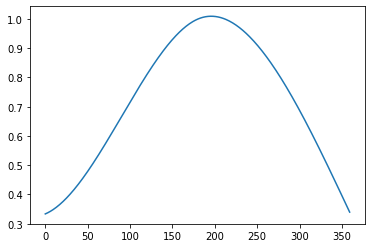

In [2]:
from scipy.interpolate import CubicSpline
x = np.arange(0, 360);

cs = CubicSpline([0,90,180,270,360],[1/3,2/3,1,5/6,1/3])
plt.plot(x,cs(x))

To overcome missing variables between 270 and 360, we can assume that the y value of the 360 point is equal to the y value of the 0 point because we can assume that this data is representative of each year and is thus cyclical

### Non Dimensionalize

Fundamental Units:
$$p: Population$$
$$t: Time$$


Variables
$$k: 1/t$$
$$N: p$$
$$P: p$$
$$H: p/t$$


Non-dimensionalized Variables:
$$[P]: P/N$$
$$[t]: tk $$
$$[H]: H/kN$$

Function defined:
$$\frac{dP}{dt} = k \big(1-\frac{P}{N}\big)P-H$$

Rewrite function:
$$\frac{d[P][N]}{d[t]/k} = k \big(1-\frac{P}{N}\big)P-H$$
$$k[N]\frac{d[P]}{d[t]} =k \big(1-\frac{P}{N}\big)P-H$$
$$\frac{d[P]}{d[t]} = \frac{1}{k[N]}\big(k \big(1-\frac{P}{N}\big)P-H\big)$$
$$\frac{d[P]}{d[t]} = \frac{1}{k[N]}\big(k \big(1-\frac{P}{N}\big)P-H\big)$$


$$\frac{d[P]}{d[t]} =\frac{1}{[P]} - \frac{1}{[N]}-[H]$$

### Slope Field without Harvest

I'm plotting it in pieces because the domain of 360 is too large to see recognizable differences.

**Winter:**

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in double_scalars
  


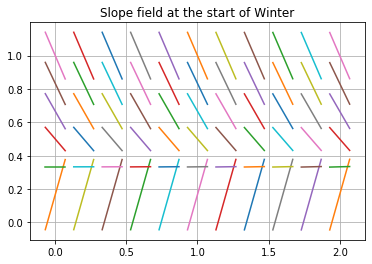

In [52]:
import numpy as np
import math
from matplotlib import pyplot as plt

def diff(t,P):
    return(1/P-1/cs(t))

t = np.linspace(0,2,11)
P = np.linspace(0,1,7)

for j in t:
    for k in P:
        slope = diff(j,k)
        domain = np.linspace(j-0.07,j+0.07,2)
        def fun(x1,y1):
            z = slope*(domain-x1)+y1
            return z
        plt.plot(domain,fun(j,k),solid_capstyle='projecting',solid_joinstyle='bevel')

plt.title("Slope field at the start of Winter")
plt.grid(True)
plt.show()

**Spring:**

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in double_scalars
  


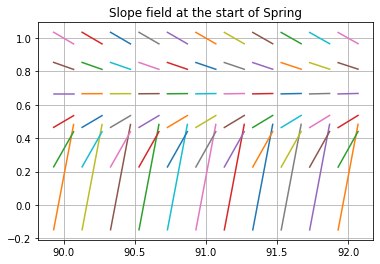

In [54]:
t = np.linspace(90,92,11)
P = np.linspace(0,1,7)

for j in t:
    for k in P:
        slope = diff(j,k)
        domain = np.linspace(j-0.07,j+0.07,2)
        def fun(x1,y1):
            z = slope*(domain-x1)+y1
            return z
        plt.plot(domain,fun(j,k),solid_capstyle='projecting',solid_joinstyle='bevel')

plt.title("Slope field at the start of Spring")
plt.grid(True)
plt.show()

**Summer:**

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in double_scalars
  


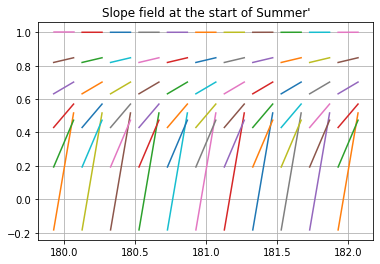

In [55]:
t = np.linspace(180,182,11)
P = np.linspace(0,1,7)

for j in t:
    for k in P:
        slope = diff(j,k)
        domain = np.linspace(j-0.07,j+0.07,2)
        def fun(x1,y1):
            z = slope*(domain-x1)+y1
            return z
        plt.plot(domain,fun(j,k),solid_capstyle='projecting',solid_joinstyle='bevel')

plt.title("Slope field at the start of Summer'")
plt.grid(True)
plt.show()

**Fall:**

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in double_scalars
  


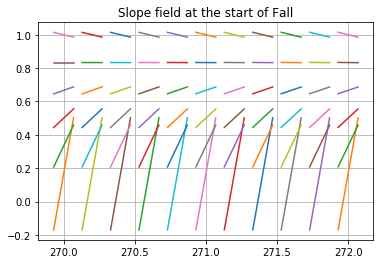

In [56]:
t = np.linspace(270,272,11)
P = np.linspace(0,1,7)

for j in t:
    for k in P:
        slope = diff(j,k)
        domain = np.linspace(j-0.07,j+0.07,2)
        def fun(x1,y1):
            z = slope*(domain-x1)+y1
            return z
        plt.plot(domain,fun(j,k),solid_capstyle='projecting',solid_joinstyle='bevel')

plt.title("Slope field at the start of Fall")
plt.grid(True)
plt.show()

The population dynamics always has a single stable steady state which equals the carrying capacity at the time. At the start of Winter, there is a steady state around 0.33, this increases to 0.66 around Spring, then 1 around Summer, and then 0.86 around Fall. This means that without hunting, the population will likely settle into the carrying capacity.

# Mass on a Wire

 ### Force along wire

Express the force along the wire in terms of $x$ and $h$:
$$F_s = k(\sqrt{x^2-h^2}-L_0)$$


Find component of force along the wire:
Since $cos(\theta) = x/s$
$$F_w = F_s*cos(\theta)$$
$$F_w = k(\sqrt{x^2-h^2}-L_0)*cos(\theta)$$
$$F_w = k(\sqrt{x^2-h^2}-L_0)\frac{x}{\sqrt{x^2+h^2}}$$
$$F_w = kx(1-\frac{L_0}{\sqrt{x^2+h^2}})$$


### Differential Equation for x

Solve for steady states:
$$ mx'' = kx(1-\frac{L_0}{\sqrt{x^2+h^2}}) - bx'$$

$$0 = kx(1-\frac{L_0}{\sqrt{x^2+h^2}}) - bx' - mx''$$


For the steady state to be reached, either all three elements of this equation has to be 0, or they have to cancel each other out.

**Situation 1:**      
Either $x=0$, or $\frac{L_0}{\sqrt{x^2+h^2}} = 1$
$x' = 0$
$x'' = 0$

**Situation 2:**      
$\frac{L_0}{\sqrt{x^2+h^2}} = bx' + mx''$


### Simplify and Analyze Stability

We can ignore $m$ if either $x''$ or $m$ is very small relative to the rest of the values in the equation ($L_0$, $k$, $b$, $x$, $x'$).

Simplified equation:
$$0 =kx(1-\frac{L_0}{\sqrt{x^2+h^2}}) - bx'$$

Since $x'=0$ in a steady state
$$0 = kx(1-\frac{L_0}{\sqrt{x^2+h^2}})$$


Given that $k$ has to be realistically a positive constant,


The steady state solutions are when $x = 0$ or $1 - \frac{L_0}{\sqrt{x^2+h^2}} = 0$

$$1 = \frac{L_0}{\sqrt{x^2+h^2}}$$
$$\sqrt{x^2+h^2} = L_0$$
$$x^2 = L_0^2 - h^2$$
$$x = \sqrt{L_0^2 - h^2}$$

Thus, steady state solutions are when:
$$x = 0$$
$$x = \pm \sqrt{L_0^2 - h^2}$$

This is an inverse saddle bifurcation, because if $x < 0$, there are no steady states. When $x = 0$, there is 1 steady state, and when $x > 0$, there are 2 steady states.

For steady states when $L_0 < h$, the steady state is unstable because the derivative is decreasing below the steady state and increasing above it. Thus a slight deviation from the steady state will push the system away from the steady state.  

For steady states when $L_0 > h$, the steady state is stable because the derivative is increasing below the steady state and decreasing above it. Thus a slight deviation from the steady state will still allow the system to settle back into the steady state. 

When $L_0=0$, the steady state is semi stable because the derivative is increasing below it and increasing above it.

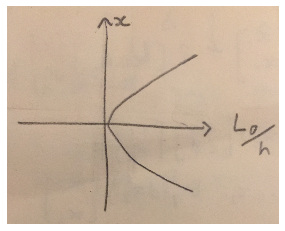

In [14]:
from PIL import Image
from matplotlib.pyplot import imshow

im2 = Image.open("bifur.JPG");
imshow(np.asarray(im2));
plt.axis('off');


# Diff Eq and Vector Spaces

### Vector Space

If the ODE is homogenous, its solution set will be a vector space because the set contains the zero vector, is closed under addition, and is closed under multiplication.


**Contains the zero vector**
$$<0> + p(x)<0> = 0$$ is True.


**Closed under addition**        
Let $y_1$ and $y_2$ be arbitrary solutions to the differential equation.

This means that
$$y_1' + p(x)y_1 = 0$$
and
$$y_2' + p(x)y_2 = 0$$

Adding those two together, we get
$$(y_1' + y_2') + p(x)(y_1 + y_2) = 0$$
Thus, $y_1 + y_2$ is also a solution.


**Closed under multiplication**        
Let $y_1$ be a solution
$$y_1' + p(x)y_1 = 0$$

Multiplying that function by a scalar value
$$ky_1' + p(x)k(y_1) = 0$$
Thus, $ky_1$ is also a solution.

______

The dimension of the vector space will be the number of coefficients in the equation. The only coefficients in the equation is $p(x)$, thus the dimension is $n$ where $n$ is the number of coefficients in $p(x)$.

### Basis

Find the integrating factor
$$IF = e^{\int p(x)} = e^{-cos(x)}$$

Multiply Eqution
$$y'e^{-cos(x)} + e^{-cos(x)}y = 0$$

Integrate
$$e^{-cos(x)}y = c$$

Divide by integrating factor
$$y = \frac{c}{e^{-cos(x)}}$$


Since $p(x)$ only contains one coefficient, the dimension of the basis is 1.


Basis: {x}

### Inhomogenous linear ODE

No, it will not be a vector space because the zero vector will not be contained
$$<0> + p(x)<0> = c$$ is False.

### Solution Combination

It's because when you substitute any solution vectors of a homogenous differential equation into the differential equation you will get 0 (definition of homogenous differential equation).

Given that $y_h$ is a basis to the homogenous differential equation, we know that for any constant $c$:
$$cy_h'+p(x)cy_h = 0$$

Given that $y_p$ is a solution to the inhomogenous differential equation, we know that
$$y_p'+p(x)cy_p = q(x)$$

Thus, we can solve for what y_T will result in when substituted into inhomogenous linear equation by expanding and simplifying:
$$(cy_h'+y_p')+p(x)(cy_h+y_p)$$
$$ = cy_h'+p(x)cy_h+y_p'+p(x)y_p$$
$$ = 0+y_p'+p(x)y_p$$
$$ = 0+q(x)$$

Thus,
$$(cy_h'+y_p')+p(x)(cy_h+y_p) = q(x)$$
Thus, $cy_h'+y_p'$ is a solution to the inhomogenous linear ODE for any constant $c$.



### General solution

First, finding the solution to the homogenous system:
$$y' + sin(x)y = 0$$

As found in part (b), the solution to this is the following vectorspace with varying $x$: 
$$y = \frac{c}{e^{-cos(x)}}$$

Now, finding a singular solution to the inhomogenous equation with the same integrating factor:
$$e^{-cos(x)}y = \int e^x(1+sin(x))$$

Integrating the right by parts 
$$e^{-cos(x)}y = e^x(sin(x)+1)-\int e^x cos(x)$$
$$e^{-cos(x)}y = e^{x-cos(x)}+e^{x-cos(x)}sin(x)$$
$$y = e^{cos(x)}(e^{x-cos(x)} + c)$$

Thus, the most general solution is
$$k(\frac{c}{e^{-cos(x)}}) + e^{cos(x)}(e^{x-cos(x)} + c)$$